<h1 style="color:red">Predictive Maintenance (PdM) of Aircraft Engine

<h5 style="color:purple">
    
Predictive Maintenance techniques are used to determine the condition of an equipment to plan the maintenance/failure ahead of its time. This is very useful as the equipment downtime cost can be reduced significantly.
<br>
    
The objective of this project is to implement various Predictive Maintenance methods and assess the performance of each. Each method can be classified broadly into two categories.
<br>
<br>
<br>
1.Classification: Predicting the failure of machine in upcoming n days
<br>
<br>
2.Regression: Predicting the remaining useful life of a machine

<br>
    
Dataset : NASA's CMAPASS Dataset

<h3 > FAILURE PREDICTION CLASSIFICATION USING MACHINE LEARNING

<p style="color:blue"> Used Models:
<br>
1. CNN -SVM <br>
2. 1D CNN
</p>

<a style="color:red"><h3> Step-I: Convolutional Neural Network - Support Vector Machine Based Binary Classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#for SKlearn Libraries
from sklearn.preprocessing import MinMaxScaler #to normalize data
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.svm import SVC

#for deep learning
import keras
import keras.backend as k
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Activation, Masking, Dropout, Conv1D, GlobalAveragePooling1D, MaxPooling1D
#from keras.optimizers import RMSprop,adam
from keras.regularizers import l2
from keras.callbacks import History
from keras import callbacks

In [71]:
import time
import os
os.chdir("C:\\Users\\usark\\OneDrive\\Desktop\\ML Datasets\\CMaps")


In [8]:
def prepare_data(drop_cols = True):
    dependent_var = ['RUL']
    index_columns_names =  ["UnitNumber","Cycle"]
    operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
    sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
    input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names

    cols_to_drop = ['OpSet3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure10', 'SensorMeasure14',
     'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19']

    df_train = pd.read_csv('train_FD001.txt',delim_whitespace=True,names=input_file_column_names)

    rul = pd.DataFrame(df_train.groupby('UnitNumber')['Cycle'].max()).reset_index()
    rul.columns = ['UnitNumber', 'max']
    df_train = df_train.merge(rul, on=['UnitNumber'], how='left')
    df_train['RUL'] = df_train['max'] - df_train['Cycle']
    df_train.drop('max', axis=1, inplace=True)

    df_test = pd.read_csv('test_FD001.txt', delim_whitespace=True, names=input_file_column_names)
    
    if(drop_cols == True):
        df_train = df_train.drop(cols_to_drop, axis = 1)
        df_test = df_test.drop(cols_to_drop, axis = 1)

    y_true = pd.read_csv('RUL_FD001.txt', delim_whitespace=True,names=["RUL"])
    y_true["UnitNumber"] = y_true.index + 1
    
    return df_train, df_test, y_true

In [10]:
df_train, df_test, y_true = prepare_data(drop_cols=True)

In [13]:
df_train.head()

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [77]:
df_train.Cycle.value_counts()

1      100
66     100
97     100
96     100
95     100
      ... 
346      1
345      1
343      1
342      1
362      1
Name: Cycle, Length: 362, dtype: int64

In [14]:
df_test.head()

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130


In [108]:
y_true[50:60]

,RUL,UnitNumber,failure
50,114,51,0
51,29,52,1
52,26,53,1
53,97,54,0
54,137,55,0
55,15,56,1
56,103,57,0
57,37,58,1
58,114,59,0
59,100,60,0


In [18]:
len(df_train),len(df_test),len(y_true)

(20631, 13096, 100)

In [109]:
20631/13096

1.5753665241295052

In [17]:
df_train.shape, df_test.shape, y_true.shape

((20631, 18), (13096, 17), (100, 2))

In [21]:
# Data Pre Processing
lst=[
df_train.duplicated().sum(),
df_test.duplicated().sum(),
y_true.duplicated().sum()]

for i in lst:
    print(i)

0
0
0


In [22]:
lst1=[
df_train.isna().sum(),
df_test.isna().sum(),
y_true.isnull().sum()]

for i in lst1:
    print(i)

UnitNumber         0
Cycle              0
OpSet1             0
OpSet2             0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure15    0
SensorMeasure17    0
SensorMeasure20    0
SensorMeasure21    0
RUL                0
dtype: int64
UnitNumber         0
Cycle              0
OpSet1             0
OpSet2             0
SensorMeasure2     0
SensorMeasure3     0
SensorMeasure4     0
SensorMeasure7     0
SensorMeasure8     0
SensorMeasure9     0
SensorMeasure11    0
SensorMeasure12    0
SensorMeasure13    0
SensorMeasure15    0
SensorMeasure17    0
SensorMeasure20    0
SensorMeasure21    0
dtype: int64
RUL           0
UnitNumber    0
dtype: int64


In [23]:
#data is totally refined with no null values / duplicated values.

In [24]:
#Domain Knowledge:

feats = df_train.columns.drop(['UnitNumber', 'Cycle', 'RUL'])
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

df_train[feats] = min_max_scaler.fit_transform(df_train[feats])
df_test[feats] = min_max_scaler.transform(df_test[feats])

In [25]:
df_train['failure'] = [1 if i < 50 else 0 for i in df_train.RUL]
y_true['failure'] = [1 if i < 50 else 0 for i in y_true.RUL]

In [26]:
df_train.head()

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL,failure
0,1,1,-0.080460,-0.666667,-0.632530,-0.186396,-0.380486,0.452496,-0.515152,-0.780490,-0.261905,0.266525,-0.588235,-0.272028,-0.333333,0.426357,0.449323,191,0
1,1,2,0.218391,-0.500000,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.799515,-0.238095,0.530917,-0.441176,-0.177376,-0.333333,0.333333,0.462027,190,0
2,1,3,-0.494253,0.500000,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.719914,-0.500000,0.590618,-0.558824,-0.285110,-0.666667,0.255814,0.242751,189,0
3,1,4,0.080460,0.000000,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.750965,-0.666667,0.778252,-0.411765,-0.666795,-0.333333,0.147287,0.324772,188,0
4,1,5,-0.218391,-0.333333,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.700081,-0.488095,0.492537,-0.529412,-0.195845,-0.166667,0.178295,0.409003,187,0


In [27]:
df_test.head()

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,0.264368,0.500000,0.090361,-0.378679,-0.461175,0.304348,-0.575758,-0.744773,-0.583333,0.292111,-0.558824,-0.382070,-0.333333,0.116279,0.323667
1,1,2,-0.310345,-0.500000,-0.698795,-0.240898,-0.555368,0.610306,-0.666667,-0.706632,-0.226190,0.479744,-0.470588,-0.573682,-0.166667,0.364341,0.373654
2,1,3,0.034483,0.166667,-0.246988,-0.306736,-0.355503,0.371981,-0.545455,-0.683837,-0.226190,0.398721,-0.558824,-0.082724,-0.166667,0.457364,0.442695
3,1,4,0.482759,0.000000,-0.259036,-0.429693,-0.183997,0.359098,-0.606061,-0.788567,-0.488095,0.147122,-0.500000,-0.485956,-0.500000,0.333333,0.324220
4,1,5,0.160920,0.000000,-0.216867,-0.295836,-0.335922,0.388084,-0.666667,-0.795208,-0.452381,0.475480,-0.558824,-0.398230,-0.666667,0.317829,0.432753


In [28]:
y_true.head()

,RUL,UnitNumber,failure
0,112,1,0
1,98,2,0
2,69,3,0
3,82,4,0
4,91,5,0


#### LSTM expects an input in the shape of a numpy array of 3 dimensions and I will need to convert train and test data accordingly.

In [29]:
def gen_train(id_df, seq_length, seq_cols):
    """
        function to prepare train data into (samples, time steps, features)
        id_df = train dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
        
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    for start, stop in zip(range(0, num_elements-seq_length+1), range(seq_length, num_elements+1)):
        lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

In [30]:
def gen_target(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length-1:num_elements+1]

In [31]:
def gen_test(id_df, seq_length, seq_cols, mask_value):
    """
        function to prepare test data into (samples, time steps, features)
        function only returns last sequence of data for every unit
        id_df = test dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
    df_mask = pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    df_mask[:] = mask_value
    
    id_df = df_mask.append(id_df,ignore_index=True)
    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    start = num_elements-seq_length
    stop = num_elements
    
    lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

In [32]:
sequence_length = 50 #predicting using last 30 cycle values
mask_value = 0

In [33]:
#generate train
x_train=np.concatenate(list(list(gen_train(df_train[df_train['UnitNumber']==unit], sequence_length, feats)) for unit in df_train['UnitNumber'].unique()))
print(x_train.shape)

(15731, 50, 15)


In [34]:
#generate target of train
y_train = np.concatenate(list(list(gen_target(df_train[df_train['UnitNumber']==unit], sequence_length, "failure")) for unit in df_train['UnitNumber'].unique()))
y_train.shape

(15731,)

In [35]:
#generate test
x_test=np.concatenate(list(list(gen_test(df_test[df_test['UnitNumber']==unit], sequence_length, feats, mask_value)) for unit in df_test['UnitNumber'].unique()))
print(x_test.shape)

(100, 50, 15)


C:\Users\usark\AppData\Local\Temp\ipykernel_24336\3243649304.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  id_df = df_mask.append(id_df,ignore_index=True)


In [36]:
#true target of test 
y_test = y_true.RUL.values
y_test.shape

(100,)

In [37]:
nb_features = x_train.shape[2]
nb_out = 1
nb_features

15

In [38]:
class_0 = pd.Series(y_train).value_counts()[0]
class_1 = pd.Series(y_train).value_counts()[1]
total = class_0 + class_1

cls_wt = {0: class_1/total, 1: class_0/total}

cls_wt

{0: 0.3178437480134766, 1: 0.6821562519865234}

#### FUNCTION FOR PRINTING RESULTS:

In [39]:
def print_results(y_test, y_pred):
    
    #f1-score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)
    print(classification_report(y_true.failure, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    b, t = plt.ylim()
    plt.ylim(b + 0.5, t - 0.5)
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    #roc_auc_score
    model_roc_auc = roc_auc_score(y_test, y_pred) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test, y_pred)
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    threshold = np.round(thresholds[ix],3)

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

In [40]:
def get_one_hot(targets, classes):
    res = np.eye(classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape) + [classes])

In [41]:
y_train_2 = get_one_hot(y_train, 2)
y_test_2 = get_one_hot(y_true.failure,2)

In [42]:
y_train_2.shape, y_test_2.shape

((15731, 2), (100, 2))

In [49]:
history2 = History()

model2 = Sequential()
model2.add(Conv1D(16, 3, activation = 'relu', input_shape=(sequence_length, nb_features)))
model2.add(Conv1D(16, 3, activation = 'relu'))
model2.add(MaxPooling1D(3))
model2.add(Conv1D(32, 3, activation = 'relu'))
model2.add(Conv1D(32, 3, activation = 'relu'))
model2.add(GlobalAveragePooling1D(name = 'feature_layer'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 48, 16)            736       
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 16)            784       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 16)            0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 13, 32)            1568      
                                                                 
 conv1d_7 (Conv1D)           (None, 11, 32)            3104      
                                                                 
 feature_layer (GlobalAvera  (None, 32)                0         
 gePooling1D)                                         

In [50]:
%%time
# fit the model
model2.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1,
          callbacks = [history2,
                      keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')])

Epoch 1/100
222/222 [==============================] - 2s 4ms/step - loss: 0.3373 - accuracy: 0.8642 - val_loss: 0.2762 - val_accuracy: 0.8895
Epoch 2/100
222/222 [==============================] - 1s 4ms/step - loss: 0.2524 - accuracy: 0.9013 - val_loss: 0.2090 - val_accuracy: 0.9060
Epoch 3/100
222/222 [==============================] - 1s 4ms/step - loss: 0.1788 - accuracy: 0.9318 - val_loss: 0.1925 - val_accuracy: 0.9250
Epoch 4/100
222/222 [==============================] - 1s 4ms/step - loss: 0.1453 - accuracy: 0.9452 - val_loss: 0.1819 - val_accuracy: 0.9295
Epoch 5/100
222/222 [==============================] - 1s 3ms/step - loss: 0.1286 - accuracy: 0.9497 - val_loss: 0.1732 - val_accuracy: 0.9314
Epoch 6/100
222/222 [==============================] - 1s 4ms/step - loss: 0.1137 - accuracy: 0.9556 - val_loss: 0.1768 - val_accuracy: 0.9314
Epoch 7/100
222/222 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9583 - val_loss: 0.2484 - val_accuracy: 0.9155

In [51]:
layer_name = 'feature_layer'
intermediate_layer_model = Model(inputs = model2.input,
                                outputs = model2.get_layer(layer_name).output)
cnn_x_train = intermediate_layer_model.predict(x_train)
cnn_x_test = intermediate_layer_model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [52]:
svc = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced')

svc.fit(cnn_x_train, y_train)


SVC(C=1, class_weight='balanced', gamma='auto')

In [53]:
svc.score(cnn_x_train, y_train)

0.9795944313775348

In [59]:
print("The Score of Accuracy:",svc.score(cnn_x_train, y_train)*100,"%")

The Score of Accuracy: 97.95944313775348 %


F1 Score:  0.8787878787878789
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        70
           1       0.81      0.97      0.88        30

    accuracy                           0.92       100
   macro avg       0.89      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100

Area under curve :  0.9333333333333335 



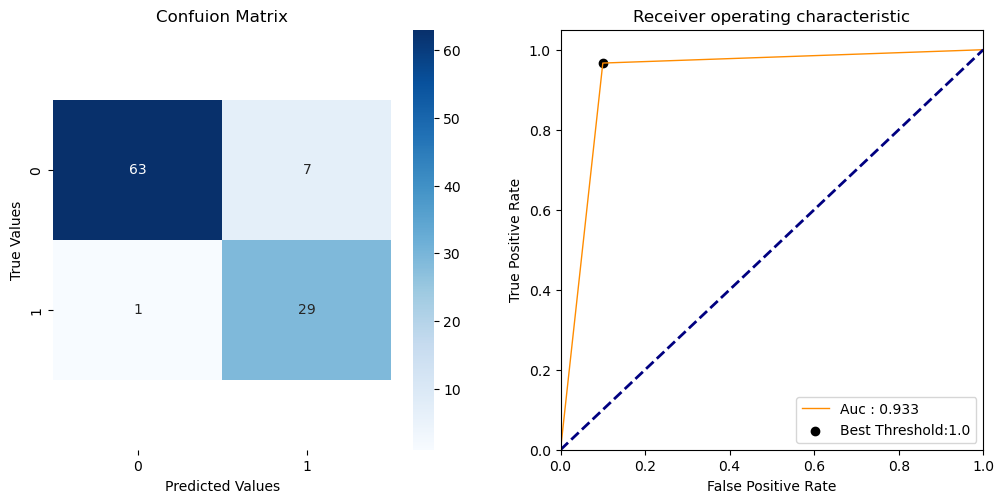

In [54]:
y_pred2 = svc.predict(cnn_x_test)

print_results(y_true.failure, y_pred2)

In [55]:
confusion_matrix(y_train, svc.predict(cnn_x_train))

array([[10482,   249],
       [   72,  4928]], dtype=int64)

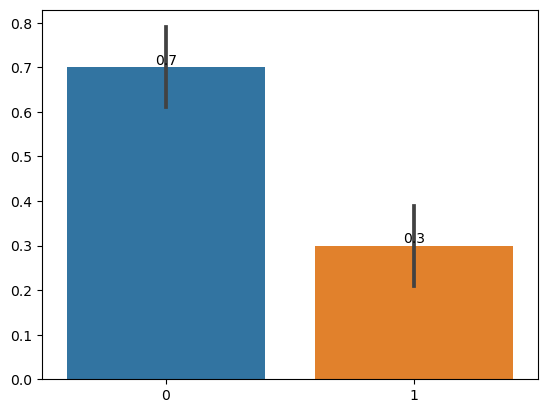

In [66]:
axile=sns.barplot(y_test_2)
for i in axile.containers:
    axile.bar_label(i)

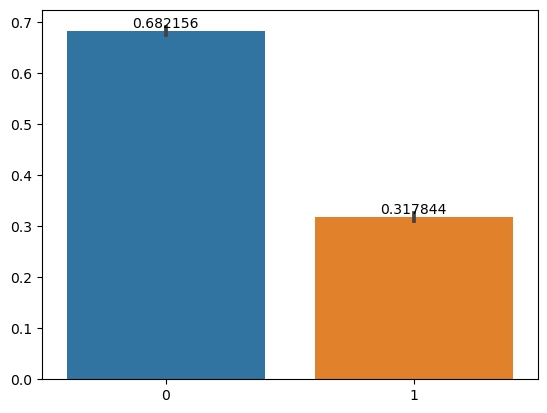

In [67]:
axile=sns.barplot(y_train_2)
for i in axile.containers:
    axile.bar_label(i)

In [68]:
cnn_x_train.shape,y_train.shape

((15731, 32), (15731,))